# Initial Exploratory Analysis

In [1]:
import os
import json
import pandas as pd

# Data is in the data directory in project_1 folder
DATA_DIR_MOV = os.path.join('data', 'boxofficemojo')

# 'listdir' function from 'os'  gives you a list of all
target_file_names_Mov = os.listdir(DATA_DIR_MOV)

movie = list()
for files in target_file_names_Mov:
    target_file_path = os.path.join(DATA_DIR_MOV, files)
    with open(target_file_path,'r') as target_file:
        movie.append(json.load(target_file))
        

movies_df = pd.DataFrame(movie)        

In [2]:
len(movies_df)

3728

In [3]:
DATA_DIR_CRI = os.path.join('data', 'metacritic')

# 'listdir' function from 'os'  gives you a list of all
target_file_names_Cri = os.listdir(DATA_DIR_CRI)

critics = list()
for files in target_file_names_Cri:
    target_file_path = os.path.join(DATA_DIR_CRI, files)
    with open(target_file_path,'r') as target_file:
        critics.append(json.load(target_file))
        

In [4]:
list_key=critics[1].keys()

count = 0            
for i,crt in enumerate(critics):
    try:
        if(list_key != crt.keys()):
            count += 1
            print i,crt
    except AttributeError:
        count=count
        print i,crt

print count

1251 {u'unable to retrieve': []}
4439 [u'/movie/11-flowers']
4765 {u'unable to retrieve': [u'/movie/once-upon-a-time-in-mexico', u'/movie/serpico']}
4766 []
2


In [5]:
# Removing Attribute Error rows which is not a dictionary
# Removing rows which doesn't have all keys
    
list_index = [1251,4439,4765,4766]

critics = [j for i,j in enumerate(critics) if i not in list_index]

In [6]:
list_key=critics[1].keys()

count = 0            
for i,crt in enumerate(critics):
    try:
        if(list_key != crt.keys()):
            count += 1
            print i,crt
    except AttributeError:
        count=count
        print i,crt

print count

0


In [7]:
# Creating Genre list

genre_list = []

for crt in critics:
    try:
        for i in crt['genre']:
            genre_list.append(i)
    except KeyError:
        print "Key Error"

In [8]:
len(genre_list)

12838

In [9]:
# Finding unique genre

unique_genre = set(genre_list)

In [10]:
len(unique_genre)

25

In [11]:
# Creating dummy variables for each reviews ofr user as well as critic
# Also, addded percentage columns

for i,crt in enumerate(critics):
    try:
        crt['critic_positive'] = crt['num_critic_reviews'][0]
        crt['critic_netural'] = crt['num_critic_reviews'][1]
        crt['critic_negative'] = crt['num_critic_reviews'][2]
        crt['critic_total'] = crt['num_critic_reviews'][3]
        
        crt['user_positive'] = crt['num_user_reviews'][0]
        crt['user_netural'] = crt['num_user_reviews'][1]
        crt['user_negative'] = crt['num_user_reviews'][2]
        crt['user_total'] = crt['num_user_reviews'][3]

        if crt['num_critic_reviews'][3] !=0:
            crt['critic_positive_pct'] = float(crt['num_critic_reviews'][0])/crt['num_critic_reviews'][3]
            crt['critic_netural_pct'] = float(crt['num_critic_reviews'][1])/crt['num_critic_reviews'][3]
            crt['critic_negative_pct'] = float(crt['num_critic_reviews'][2])/crt['num_critic_reviews'][3]
        else:
            crt['critic_positive_pct'] = 0.0
            crt['critic_netural_pct'] = 0.0
            crt['critic_negative_pct'] = 0.0
            
        if crt['num_user_reviews'][3] !=0:
            crt['user_positive_pct'] = float(crt['num_user_reviews'][0])/crt['num_user_reviews'][3]
            crt['user_netural_pct'] = float(crt['num_user_reviews'][1])/crt['num_user_reviews'][3]
            crt['user_negative_pct'] = float(crt['num_user_reviews'][2])/crt['num_user_reviews'][3]
        else:
            crt['user_positive_pct'] = 0.0
            crt['user_netural_pct'] = 0.0
            crt['user_negative_pct'] = 0.0    
    
    except KeyError:
        print i,"Key Error"

In [12]:
# Adding columns for each genre and making it 1 if the movie belongs to that genre

for i,crt in enumerate(critics):
    try:
        for gr in unique_genre:
            if gr in crt['genre']:
                crt[gr]=1
            else:
                crt[gr]=0
    except KeyError:
        print "Key Error"
            

In [13]:
critics_df=pd.DataFrame(critics)

In [14]:
critics_df.shape

(4763, 54)

In [15]:
# Creating cleaned title with only character and number

movies_df['cleaned_title'] = movies_df['title'].str.lower()
movies_df['cleaned_title'] = movies_df['cleaned_title'].str.replace("\W",'')

critics_df['cleaned_title'] = critics_df['title'].str.lower()
critics_df['cleaned_title'] = critics_df['cleaned_title'].str.replace("\W",'')

In [16]:
# Joining both the data on cleaned title

movie_critics_df = pd.merge(movies_df, critics_df, on='cleaned_title', how='inner')

In [17]:
movie_critics_df.shape

(3513, 68)

In [18]:
# Mismatch data from movies_df

len(movies_df[~movies_df.cleaned_title.isin(movie_critics_df.cleaned_title)])

242

In [26]:
genere_count = dict()
count = 0
for i in unique_genre:
    count = sum(movie_critics_df[i])
    genere_count[i]= count

In [203]:
genere_count

{u'Action': 654,
 u'Adult': 1,
 u'Adventure': 443,
 u'Animation': 150,
 u'Biography': 204,
 u'Comedy': 1236,
 u'Crime': 619,
 u'Documentary': 209,
 u'Drama': 1925,
 u'Family': 291,
 u'Fantasy': 321,
 u'Film-Noir': 0,
 u'History': 138,
 u'Horror': 344,
 u'Music': 109,
 u'Musical': 60,
 u'Mystery': 349,
 u'News': 8,
 u'Romance': 691,
 u'Sci-Fi': 304,
 u'Short': 0,
 u'Sport': 104,
 u'Thriller': 1096,
 u'War': 134,
 u'Western': 40}

In [28]:
import operator

sorted_genre_count = sorted(genere_count.items(), key=operator.itemgetter(1), )

In [49]:
top_genre_list = [sorted_genre_count[i] for i in range(len(sorted_genre_count)) if sorted_genre_count[i][1]>500]

In [64]:
top_genre = [top_genre_list[i][0] for i in range(len(top_genre_list))]

In [204]:
top_genre

[u'Crime', u'Action', u'Romance', u'Thriller', u'Comedy', u'Drama']

In [129]:
drama_df = movie_critics_df[movie_critics_df.Drama == 1][['title_x','director_x','domestic_gross','opening_weekend_take','year_x']]
drama_df['Genre_dummy'] = 'Drama'

comedy_df = movie_critics_df[movie_critics_df.Comedy == 1][['title_x','director_x','domestic_gross','opening_weekend_take','year_x']]
comedy_df['Genre_dummy'] = 'Comedy'

thriller_df = movie_critics_df[movie_critics_df.Thriller == 1][['title_x','director_x','domestic_gross','opening_weekend_take','year_x']]
thriller_df['Genre_dummy'] = 'Thriller'

romance_df = movie_critics_df[movie_critics_df.Romance == 1][['title_x','director_x','domestic_gross','opening_weekend_take','year_x']]
romance_df['Genre_dummy'] = 'Romance'

action_df = movie_critics_df[movie_critics_df.Action == 1][['title_x','director_x','domestic_gross','opening_weekend_take','year_x']]
action_df['Genre_dummy'] = 'Action'

crime_df = movie_critics_df[movie_critics_df.Crime == 1][['title_x','director_x','domestic_gross','opening_weekend_take','year_x']]
crime_df['Genre_dummy'] = 'Crime'

In [130]:
len(drama_df)

1925

In [131]:
frames = [drama_df,comedy_df,thriller_df,romance_df,action_df,crime_df]

In [132]:
top_genre_df = pd.concat(frames)

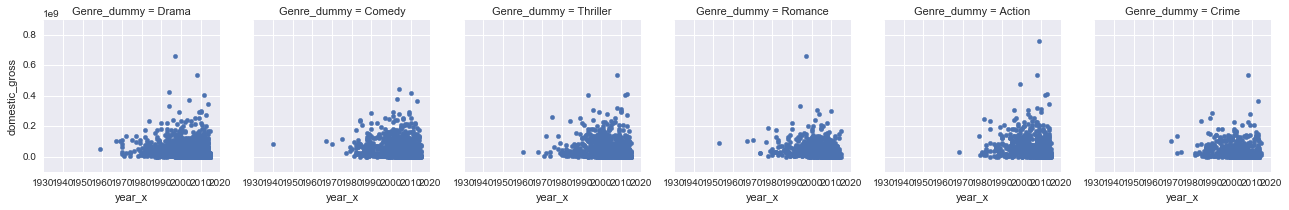

In [133]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

by_genre = seaborn.FacetGrid(top_genre_df, col="Genre_dummy")
by_genre.map(plt.scatter, "year_x", "domestic_gross")

In [149]:
top_genre_latest_df = top_genre_df[top_genre_df.year_x >= 1990]

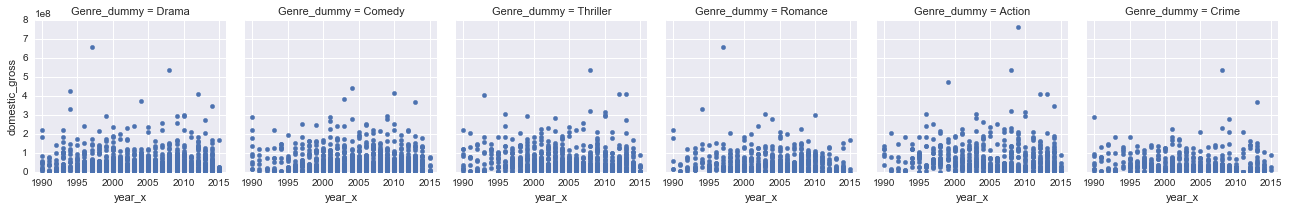

In [168]:
by_genre_latest = seaborn.FacetGrid(top_genre_latest_df, col="Genre_dummy", ylim=(0,800000000), xlim=(1989,2016))
by_genre_latest.map(plt.scatter, "year_x", "domestic_gross")

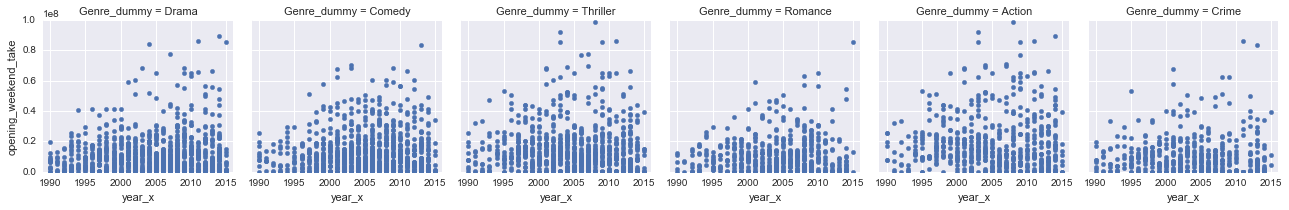

In [171]:
by_genre_latest = seaborn.FacetGrid(top_genre_latest_df, col="Genre_dummy", ylim=(0,100000000), xlim=(1989,2016))
by_genre_latest.map(plt.scatter, "year_x", "opening_weekend_take")

In [196]:
# plt.subplots(3,5)   --->  (figure, axes) ---> axes --> table of 3x5 things .... 

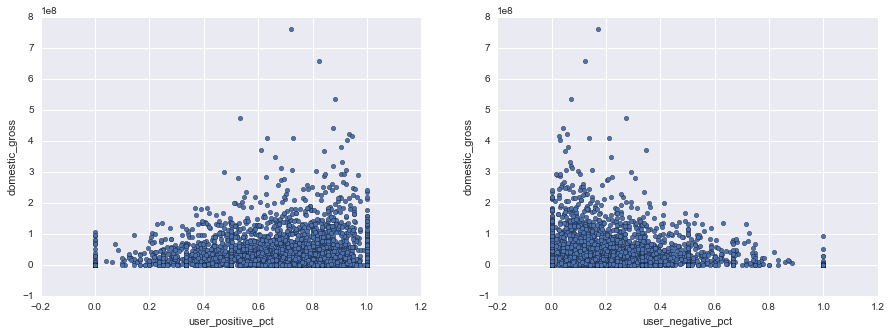

In [201]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 5))
movie_critics_df.plot.scatter(ax = ax0, x='user_positive_pct', y='domestic_gross');
movie_critics_df.plot.scatter(ax = ax1, x='user_negative_pct', y='domestic_gross');

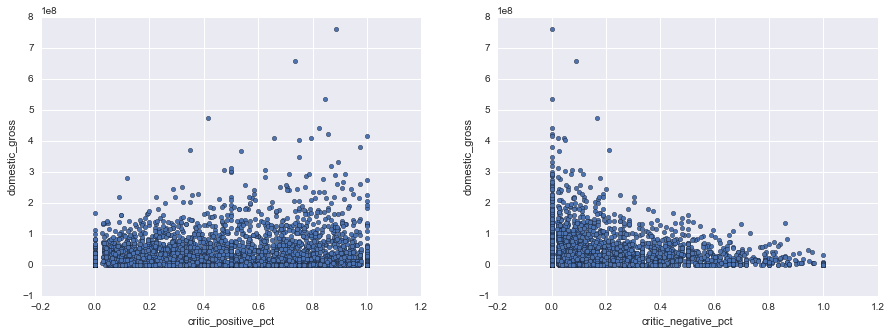

In [202]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 5))
movie_critics_df.plot.scatter(ax = ax0, x='critic_positive_pct', y='domestic_gross');
movie_critics_df.plot.scatter(ax = ax1, x='critic_negative_pct', y='domestic_gross');